In [1]:
import numpy.random as random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.linear_model
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from matplotlib.pylab import rcParams

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
random.seed(seed=25200)

In [4]:
data1 = pd.read_csv('2016_2017.csv')
data2 = pd.read_csv('2017_2018.csv')
print(data1.shape)
print(data2.shape)
data1 = data1.dropna()
data2 = data2.dropna()
data1 = data1.drop(['sign','Id','Geography'],axis = 1)
data2 = data2.drop(['sign','Id','Geography'],axis = 1)
data1 = data1.set_index('location')
data2 = data2.set_index('location')
print(data1.shape)
print(data2.shape)
data1.head()

(1886, 2069)
(1860, 2089)
(1885, 2065)
(1859, 2085)


Estimate; HOUSEHOLDS BY TYPE - Total households  \
location                                                       
36005000100                                              0.0   
36005000200                                           1331.0   
36005000400                                           1926.0   
36005001600                                           1970.0   
36005001900                                            962.0   

             Margin of Error; HOUSEHOLDS BY TYPE - Total households  \
location                                                              
36005000100                                               16.0        
36005000200                                               96.0        
36005000400                                               88.0        
36005001600                                               73.0        
36005001900                                               47.0        

             Percent; HOUSEHOLDS BY TYPE - Total households  \
location                                                      
36005000100                                             0.0   
36005000200                                          1331.0   
36005000400                                          1926.0   
36005001600                                          1970.0   
36005001900                                           962.0   

            Percent Margin of Error; HOUSEHOLDS BY TYPE - Total households  \
location                                                                     
36005000100                                                (X)               
36005000200                                                (X)               
36005000400                                                (X)               
36005001600                                                (X)               
36005001900                                                (X)               

             Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                      
36005000100                                                0.0                                
36005000200                                             1075.0                                
36005000400                                             1530.0                                
36005001600                                             1475.0                                
36005001900                                              458.0                                

             Margin of Error; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                             
36005000100                                               16.0                                       
36005000200                                              115.0                                       
36005000400                                              131.0                                       
36005001600                                              123.0                                       
36005001900                                               60.0                                       

            Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                    
36005000100                                                  -                              
36005000200                                               80.8                              
36005000400                                               79.4                              
36005001600                                               74.9                              
36005001900                                               47.6                              

            Percent Margin of Error; HOUSEHO

In [5]:
data1["('Count',)"] = data1["('Count',)"] / data1['Estimate; HOUSEHOLDS BY TYPE - Total households']
data2["('Count',)"] = data2["('Count',)"] / data2['Estimate; HOUSEHOLDS BY TYPE - Total households']
data1.head()

Estimate; HOUSEHOLDS BY TYPE - Total households  \
location                                                       
36005000100                                              0.0   
36005000200                                           1331.0   
36005000400                                           1926.0   
36005001600                                           1970.0   
36005001900                                            962.0   

             Margin of Error; HOUSEHOLDS BY TYPE - Total households  \
location                                                              
36005000100                                               16.0        
36005000200                                               96.0        
36005000400                                               88.0        
36005001600                                               73.0        
36005001900                                               47.0        

             Percent; HOUSEHOLDS BY TYPE - Total households  \
location                                                      
36005000100                                             0.0   
36005000200                                          1331.0   
36005000400                                          1926.0   
36005001600                                          1970.0   
36005001900                                           962.0   

            Percent Margin of Error; HOUSEHOLDS BY TYPE - Total households  \
location                                                                     
36005000100                                                (X)               
36005000200                                                (X)               
36005000400                                                (X)               
36005001600                                                (X)               
36005001900                                                (X)               

             Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                      
36005000100                                                0.0                                
36005000200                                             1075.0                                
36005000400                                             1530.0                                
36005001600                                             1475.0                                
36005001900                                              458.0                                

             Margin of Error; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                             
36005000100                                               16.0                                       
36005000200                                              115.0                                       
36005000400                                              131.0                                       
36005001600                                              123.0                                       
36005001900                                               60.0                                       

            Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families)  \
location                                                                                    
36005000100                                                  -                              
36005000200                                               80.8                              
36005000400                                               79.4                              
36005001600                                               74.9                              
36005001900                                               47.6                              

            Percent Margin of Error; HOUSEHO

In [6]:
col_names = ['Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate',
            'Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)',
            'Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)',
            'Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months',
            'Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
            'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.00 or less',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.01 to 1.50',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.51 or more',
            'Estimate; ROOMS - Total housing units - Median rooms',
            'Estimate; VALUE - Owner-occupied units - Median (dollars)',
            'Estimate; GROSS RENT - Occupied units paying rent - Median (dollars)',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Utility gas',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Bottled, tank, or LP gas',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Electricity',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Fuel oil, kerosene, etc.',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Coal or coke',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Wood',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Solar energy',
            'Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - White',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - Black or African American',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - American Indian and Alaska Native',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - Asian',
             'Percent; SEX AND AGE - 65 years and over',
             'Percent; SEX AND AGE - Under 5 years',
            ]
col_names += ['Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family',
             'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households',
            'Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
            'Percent; MARITAL STATUS - Males 15 years and over - Never married',
            'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
            'Percent; MARITAL STATUS - Males 15 years and over - Separated',
            'Percent; MARITAL STATUS - Males 15 years and over - Widowed',
            'Percent; MARITAL STATUS - Males 15 years and over - Divorced',
            'Percent; MARITAL STATUS - Females 15 years and over - Never married',
            'Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated',
            'Percent; MARITAL STATUS - Females 15 years and over - Separated',
            'Percent; MARITAL STATUS - Females 15 years and over - Widowed',
            'Percent; MARITAL STATUS - Females 15 years and over - Divorced',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Under 18 years - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 18 to 64 years - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 65 years and over - With a disability',
            'Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over - Same house',
            'Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over - Different house in the U.S. - Same county',
             "('Count',)"]
print(len(col_names))
data1 = data1[col_names]
len(data1.columns)

51


51

In [7]:
col_names = ['Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate',
            'Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)',
            'Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)',
            'Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months',
            'Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage',
            'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.00 or less',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.01 to 1.50',
            'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.51 or more',
            'Estimate; ROOMS - Total housing units - Median rooms',
            'Estimate; VALUE - Owner-occupied units - Median (dollars)',
            'Estimate; GROSS RENT - Occupied units paying rent - Median (dollars)',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Utility gas',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Bottled, tank, or LP gas',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Electricity',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Fuel oil, kerosene, etc.',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Coal or coke',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Wood',
            'Percent; HOUSE HEATING FUEL - Occupied housing units - Solar energy',
            'Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - White',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - Black or African American',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - American Indian and Alaska Native',
             'Percent; RACE - Race alone or in combination with one or more other races - Total population - Asian',
             'Percent; SEX AND AGE - 65 years and over',
             'Percent; SEX AND AGE - Under 5 years',
            ]
col_names += ['Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family',
             'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family - With own children of the householder under 18 years',
            'Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households',
            'Percent; HOUSEHOLDS BY TYPE - Households with one or more people 65 years and over',
            'Percent; MARITAL STATUS - Males 15 years and over - Never married',
            'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
            'Percent; MARITAL STATUS - Males 15 years and over - Separated',
            'Percent; MARITAL STATUS - Males 15 years and over - Widowed',
            'Percent; MARITAL STATUS - Males 15 years and over - Divorced',
            'Percent; MARITAL STATUS - Females 15 years and over - Never married',
            'Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated',
            'Percent; MARITAL STATUS - Females 15 years and over - Separated',
            'Percent; MARITAL STATUS - Females 15 years and over - Widowed',
            'Percent; MARITAL STATUS - Females 15 years and over - Divorced',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Under 18 years - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 18 to 64 years - With a disability',
            'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 65 years and over - With a disability',
            'Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over - Same house',
            'Percent; RESIDENCE 1 YEAR AGO - Population 1 year and over - Different house in the U.S. - Same county',
             "('Count',)"]
print(len(col_names))
data2 = data2[col_names]
len(data2.columns)

51


51

In [8]:
def clean(string):
    if isinstance(string,str):
        try:
            return float(string.rstrip('+').rstrip('-').replace(',',''))
        except:
            return string
    else:
        return string
datacols = np.array(data1.columns)
for col in datacols:
    data1[col] = data1[col].apply(clean)
datacols = np.array(data2.columns)
for col in datacols:
    data2[col] = data2[col].apply(clean)
data2.head()

Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate  \
location                                                                            
36005000200                                               12.4                      
36005000400                                                7.4                      
36005001600                                                9.1                      
36005001900                                               13.4                      
36005002000                                                 19                      

            Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)  \
location                                                                       
36005000200                                               41.8                 
36005000400                                               47.7                 
36005001600                                               38.6                 
36005001900                                               44.1                 
36005002000                                                 41                 

            Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)  \
location                                                                                                                              
36005000200                                              73687                                                                        
36005000400                                              94280                                                                        
36005001600                                              41480                                                                        
36005001900                                              50650                                                                        
36005002000                                              33418                                                                        

            Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months  \
location                                                                                                                              
36005000200                                                 26                                                                        
36005000400                                               19.3                                                                        
36005001600                                               39.7                                                                        
36005001900                                               28.5                                                                        
36005002000                                               52.6                                                                        

            Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage  \
location                                                                                                                   
36005000200                                                8.3                                                             
36005000400                                                4.6                                                             
36005001600                                                8.6                                                             
36005001900                                               17.2                                                             
36005002000                                                8.7                                                             

            Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS B

In [9]:
print(data1.shape)
data1 = data1.replace([np.inf, -np.inf],np.nan)
data1 = data1[data1 != '-']
data1 = data1[data1 != 'N']
data1 = data1.dropna()
print(data1.shape)
data1.head()

(1885, 51)
(1688, 51)


Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate  \
location                                                                            
36005000200                                                6.8                      
36005000400                                                  9                      
36005001600                                                8.4                      
36005001900                                               16.4                      
36005002000                                               17.1                      

            Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)  \
location                                                                       
36005000200                                                 44                 
36005000400                                               48.4                 
36005001600                                               35.8                 
36005001900                                               43.8                 
36005002000                                               44.2                 

            Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)  \
location                                                                                                                              
36005000200                                              80621                                                                        
36005000400                                              82182                                                                        
36005001600                                              39721                                                                        
36005001900                                              49066                                                                        
36005002000                                              30926                                                                        

            Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months  \
location                                                                                                                              
36005000200                                               22.4                                                                        
36005000400                                               22.6                                                                        
36005001600                                               40.7                                                                        
36005001900                                               27.5                                                                        
36005002000                                               56.8                                                                        

            Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage  \
location                                                                                                                   
36005000200                                                8.5                                                             
36005000400                                                5.8                                                             
36005001600                                                9.4                                                             
36005001900                                                 19                                                             
36005002000                                               12.5                                                             

            Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS B

In [10]:
print(data2.shape)
data2 = data2.replace([np.inf, -np.inf],np.nan)
data2 = data2[data2 != '-']
data2 = data2[data2 != 'N']
data2 = data2.dropna()
print(data2.shape)
data2.head()

(1859, 51)
(1687, 51)


Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate  \
location                                                                            
36005000200                                               12.4                      
36005000400                                                7.4                      
36005001600                                                9.1                      
36005001900                                               13.4                      
36005002000                                                 19                      

            Estimate; COMMUTING TO WORK - Mean travel time to work (minutes)  \
location                                                                       
36005000200                                               41.8                 
36005000400                                               47.7                 
36005001600                                               38.6                 
36005001900                                               44.1                 
36005002000                                                 41                 

            Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)  \
location                                                                                                                              
36005000200                                              73687                                                                        
36005000400                                              94280                                                                        
36005001600                                              41480                                                                        
36005001900                                              50650                                                                        
36005002000                                              33418                                                                        

            Percent; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - With Food Stamp/SNAP benefits in the past 12 months  \
location                                                                                                                              
36005000200                                                 26                                                                        
36005000400                                               19.3                                                                        
36005001600                                               39.7                                                                        
36005001900                                               28.5                                                                        
36005002000                                               52.6                                                                        

            Percent; HEALTH INSURANCE COVERAGE - Civilian noninstitutionalized population - No health insurance coverage  \
location                                                                                                                   
36005000200                                                8.3                                                             
36005000400                                                4.6                                                             
36005001600                                                8.6                                                             
36005001900                                               17.2                                                             
36005002000                                                8.7                                                             

            Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS B

In [11]:
Y = data1["('Count',)"]
Y_real = data2["('Count',)"]
Y.shape

(1688,)

In [12]:
X = data1.drop(["('Count',)"],axis = 1)
X_real = data2.drop(["('Count',)"],axis = 1)
X.shape

(1688, 50)

In [13]:
X.shape,Y.shape

((1688, 50), (1688,))

# Split dataset

In [14]:
x_train_val,x_test,y_train_val,y_test=train_test_split(X,Y,test_size=0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.2)

# Baseline model Linear regression

In [15]:
model=sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train_val,y_train_val)
y_pred = model.predict(x_test)
mean_squared_error(y_test,y_pred)

4.514571213439664e-05

In [16]:
xx = np.array(x_train_val).astype(float)
yy = np.array(y_train_val).astype(float)
model=sm.OLS(yy,xx)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     25.14
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          3.53e-155
Time:                        15:36:56   Log-Likelihood:                 4587.9
No. Observations:                1350   AIC:                            -9076.
Df Residuals:                    1300   BIC:                            -8815.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.782e-06   6.99e-05      0.026      0.9

# Linear Regression (With Lasso)

Text(0,0.5,'Validation MSE')

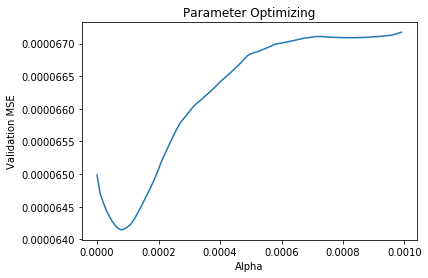

In [56]:
scale_x_train = scale(x_train)
scale_x_train_val = scale(x_train_val)
scale_x_val = scale(x_val)
scale_x_test = scale(x_test)
mse_val = []
range_ = [i/100000 for i in list(range(0,100))]
for alpha in range_:
    model=linear_model.Lasso(alpha= alpha,fit_intercept = True)
    model.fit(scale_x_train, y_train)
    y_pred=model.predict(scale_x_val)
    error = mean_squared_error(y_val,y_pred)
    mse_val.append(error)
plt.plot(range_,mse_val)
plt.title('Parameter Optimizing')
plt.xlabel('Alpha')
plt.ylabel('Validation MSE')

In [57]:
mse_val = np.array(mse_val)
bestalpha = range_[mse_val.argmin()]
bestalpha

8e-05

In [58]:
model = sklearn.linear_model.Lasso(alpha= bestalpha,fit_intercept = True)
model.fit(scale_x_train_val, y_train_val)
y_pred=model.predict(scale_x_test)
mean_squared_error(y_test,y_pred)

4.461949041336601e-05

In [59]:
# rdata = pd.DataFrame(scale_x_train_val, y_train_val)
# rdata.reset_index(inplace = True)
# rdata.columns = ['rat_ratio'] + list(x_train_val.columns)
# rdata.head()
# rdata.to_csv('rdata.csv')

In [60]:
coefs = pd.DataFrame(model.coef_)
colnames = x_train_val.columns
coefs.index = colnames
coefs.columns = ['Coefficient']
coefs # To see all variables
vars_ = coefs[coefs != 0].dropna() # Tp see variables with non-zero coefs
vars_

Coefficient
Estimate; INCOME AND BENEFITS (IN 2016 INFLATIO...    -0.000841
Percent; INCOME AND BENEFITS (IN 2016 INFLATION...     0.000033
Percent; OCCUPANTS PER ROOM - Occupied housing ...     0.000167
Percent; OCCUPANTS PER ROOM - Occupied housing ...    -0.000037
Estimate; ROOMS - Total housing units - Median ...     0.000395
Estimate; VALUE - Owner-occupied units - Median...     0.001202
Percent; HOUSE HEATING FUEL - Occupied housing ...     0.000473
Percent; HOUSE HEATING FUEL - Occupied housing ...    -0.000032
Percent; HOUSE HEATING FUEL - Occupied housing ...    -0.000914
Percent; HOUSE HEATING FUEL - Occupied housing ...     0.000097
Percent; HOUSING OCCUPANCY - Total housing unit...     0.000742
Percent; RACE - Race alone or in combination wi...    -0.000309
Percent; RACE - Race alone or in combination wi...     0.000232
Percent; RACE - Race alone or in combination wi...    -0.000546
Percent; SEX AND AGE - 65 years and over              -0.000710
Percent; SEX AND AGE - Under 5 years                   0.000350
Percent; HOUSEHOLDS BY TYPE - Total households ...    -0.000071
Percent; HOUSEHOLDS BY TYPE - Total households ...     0.001024
Percent; HOUSEHOLDS BY TYPE - Households with o...    -0.000319
Percent; MARITAL STATUS - Males 15 years and ov...    -0.000733
Percent; MARITAL STATUS - Males 15 years and ov...     0.000008
Percent; MARITAL STATUS - Males 15 years and ov...     0.000164
Percent; MARITAL STATUS - Females 15 years and ...     0.000788
Percent; MARITAL STATUS - Females 15 years and ...     0.000198
Percent; MARITAL STATUS - Females 15 years and ...    -0.000011
Percent; MARITAL STATUS - Females 15 years and ...    -0.000184
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...     0.000408
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...     0.000167
Percent; RESIDENCE 1 YEAR AGO - Population 1 ye...     0.000421

In [62]:
from regressors import stats
pvals = stats.coef_pval(model,scale_x_train_val, y_train_val)
pvals = pd.DataFrame(pvals)
colnames = ['intercept'] + list(x_train_val.columns)
pvals.index = colnames
pvals.columns = ['P-values']
pvals = pvals.drop('intercept',axis = 0)
pc_result = pvals.join(coefs)
pc_result.sort_values(by = 'P-values')

P-values  Coefficient
Estimate; VALUE - Owner-occupied units - Median...  0.000344     0.001202
Percent; HOUSING OCCUPANCY - Total housing unit...  0.003522     0.000742
Estimate; INCOME AND BENEFITS (IN 2016 INFLATIO...  0.095953    -0.000841
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...  0.109895     0.000408
Percent; RACE - Race alone or in combination wi...  0.158890    -0.000546
Percent; HOUSE HEATING FUEL - Occupied housing ...  0.194482    -0.000914
Percent; SEX AND AGE - 65 years and over            0.212864    -0.000710
Percent; RESIDENCE 1 YEAR AGO - Population 1 ye...  0.216556     0.000421
Percent; SEX AND AGE - Under 5 years                0.242944     0.000350
Percent; RACE - Race alone or in combination wi...  0.319745     0.000232
Estimate; ROOMS - Total housing units - Median ...  0.410967     0.000395
Percent; HOUSEHOLDS BY TYPE - Households with o...  0.524347    -0.000319
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...  0.625805     0.000167
Percent; RACE - Race alone or in combination wi...  0.659074    -0.000309
Percent; HOUSE HEATING FUEL - Occupied housing ...  0.667550     0.000097
Percent; HOUSE HEATING FUEL - Occupied housing ...  0.804450     0.000473
Percent; MARITAL STATUS - Males 15 years and ov...  0.860211     0.000164
Percent; HOUSE HEATING FUEL - Occupied housing ...  0.894500    -0.000032
Percent; MARITAL STATUS - Females 15 years and ...  0.906584     0.000198
Percent; MARITAL STATUS - Females 15 years and ...  0.944925    -0.000184
Percent; INCOME AND BENEFITS (IN 2016 INFLATION...  0.949868     0.000033
Percent; MARITAL STATUS - Females 15 years and ...  0.977501     0.000788
Percent; HOUSEHOLDS BY TYPE - Total households ...  0.979458     0.001024
Percent; HOUSEHOLDS BY TYPE - Total households ...  0.980424    -0.000071
Percent; MARITAL STATUS - Males 15 years and ov...  0.980787    -0.000733
Percent; MARITAL STATUS - Males 15 years and ov...  0.994526     0.000008
Percent; OCCUPANTS PER ROOM - Occupied housing ...  0.995211     0.000167
Percent; OCCUPANTS PER ROOM - Occupied housing ...  0.995393    -0.000037
Percent; MARITAL STATUS - Females 15 years and ...  0.997508    -0.000011
Percent; OCCUPANTS PER ROOM - Occupied housing ...  1.000000    -0.000000
Estimate; GROSS RENT - Occupied units paying re...  1.000000    -0.000000
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...  1.000000    -0.000000
Estimate; COMMUTING TO WORK - Mean travel time ...  1.000000     0.000000
Percent; DISABILITY STATUS OF THE CIVILIAN NONI...  1.000000     0.000000
Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOS...  1.000000     0.000000
Percent; HOUSE HEATING FUEL - Occupied housing ...  1.000000     0.000000
Percent; MARITAL STATUS - Females 15 years and ...  1.000000    -0.000000
Percent; HOUSE HEATING FUEL - Occupied housing ...  1.000000     0.000000
Percent; MARITAL STATUS - Males 15 years and ov...  1.000000    -0.000000
Percent; HOUSE HEATING FUEL - Occupied housing ...  1.000000     0.000000
Percent; HEALTH INSURANCE COVERAGE - Civilian n...  1.000000    -0.000000
Percent; RACE - Race alone or in combination wi...  1.000000     0.000000
Percent; MARITAL STATUS - Males 15 years and ov...  1.000000     0.000000
Percent; RESIDENCE 1 YEAR AGO - Population 1 ye...  1.000000    -0.000000
Percent; HOUSEHOLDS BY TYPE - Total households ...  1.000000    -0.000000
Percent; HOUSEHOLDS BY TYPE - Total households ...  1.000000    -0.000000
Percent; HOUSEHOLDS BY TYPE - Total households ...  1.000000    -0.000000
Percent; HOUSEHOLDS BY TYPE - Total households ...  1.000000     0.000000
Percent; HOUSEHOLDS BY TYPE - Total households ...  1.000000    -0.000000
Percent; EMPLOYMENT STATUS - Civilian labor for...  1.000000     0.000000

In [23]:
stats.summary(model,scale_x_train_val, y_train_val)

Residuals:
Min      1Q  Median      3Q     Max
-0.1019 -0.0017  0.0017  0.0043  0.0113


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.007106    0.000222  32.0660  0.000000
x1          0.000000    0.000295   0.0000  1.000000
x2          0.000000    0.000343   0.0000  1.000000
x3         -0.000841    0.000505  -1.6660  0.095953
x4          0.000033    0.000518   0.0629  0.949868
x5         -0.000000    0.000315  -0.0000  1.000000
x6          0.000000    0.000443   0.0000  1.000000
x7          0.000167    0.027897   0.0060  0.995211
x8         -0.000000    0.013003  -0.0000  1.000000
x9         -0.000037    0.006428  -0.0058  0.995393
x10         0.000395    0.000480   0.8224  0.410967
x11         0.001202    0.000335   3.5892  0.000344
x12        -0.000000    0.000397  -0.0000  1.000000
x13         0.000473    0.001910   0.2476  0.804450
x14        -0.000032    0.000239  -0.1326  0.894500
x15        -0.000914    0.000704  -1.2981  0.194482
x16         0

# Random Forest

In [131]:
# parameters = {
#      'n_estimators':[i for i in range(20,100,20)], # Number of trees
#      'max_depth':list(range(2,15,4)),
#      'min_samples_split': list(range(30,100,30)),
#      'min_samples_leaf': list(range(20,100,30))
# }
# model_3 = GridSearchCV(RandomForestRegressor(),parameters,cv=5,iid=False)
# model_3.fit(x_train, np.ravel(y_train))
# model_3.best_score_, model_3.best_params_

(0.16196021071780822,
 {'max_depth': 10,
  'min_samples_leaf': 20,
  'min_samples_split': 30,
  'n_estimators': 20})

In [132]:
# parameters = {
#      'n_estimators':[i for i in range(10,30,5)], # Number of trees
#      'max_depth':list(range(6,15,3)),
#      'min_samples_split': list(range(10,50,5)),
#      'min_samples_leaf': list(range(10,50,5))
# }
# model_3 = GridSearchCV(RandomForestRegressor(),parameters,cv=5,iid=False)
# model_3.fit(x_train, np.ravel(y_train))
# model_3.best_score_, model_3.best_params_

(0.18055606905002008,
 {'max_depth': 6,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'n_estimators': 10})

In [24]:
rf = RandomForestRegressor(max_depth= 6,min_samples_leaf = 15,min_samples_split= 20,n_estimators=10)
rf.fit(x_train, np.ravel(y_train))
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
num = 30
plt.barh(range(num), importances[indices][-num:], color='b', align='center')
plt.yticks(range(num),x_train.columns[indices][-num:])
plt.xlabel('Relative Importance')

Text(0.5,0,'Relative Importance')

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
num = 30
plt.barh(range(num), importances[indices][-num:], color='b', align='center')
names = ['2']
plt.yticks(range(num),names)
plt.xlabel('Relative Importance')

In [25]:
y_pred = rf.predict(x_test)
mean_squared_error(y_test,y_pred)

4.3072202184372485e-05

In [26]:
Y_pred = rf.predict(X_real)
mean_squared_error(Y_pred,Y_real)

5.148883219821773e-05

# KNN

In [27]:
mse_val = []
range_ = list(range(1,30))
for K in range_:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(scale(x_train), scale(y_train))  #fit the model
    y_pred=model.predict(scale(x_val)) #make prediction on test set
    error = mean_squared_error(scale(y_val),y_pred) #calculate mse
    mse_val.append(error) #store mse values
plt.plot(range_,mse_val)
plt.title('Parameter Optimizing')
plt.xlabel('K')
plt.ylabel('Validation MSE')

Text(0,0.5,'Validation MSE')

In [28]:
mse_val = np.array(mse_val)
bestK = range_[mse_val.argmin()]
bestK

24

In [29]:
model = neighbors.KNeighborsRegressor(n_neighbors = bestK)
model.fit(x_train_val, y_train_val)
y_pred=model.predict(x_test)
mean_squared_error(y_test,y_pred)

5.1366702438634944e-05

# PCR

Text(0,0.5,'Validation MSE')

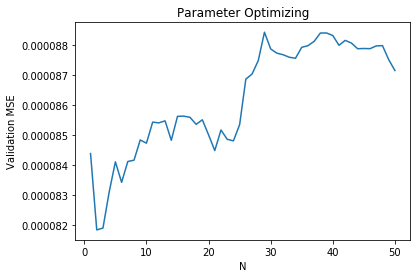

In [30]:
N = X.shape[1]
pca = PCA()
errors = []
x_reduced_train = pca.fit_transform(scale(x_train))
x_reduced_test = pca.fit_transform(scale(x_test))
x_reduced_val = pca.fit_transform(scale(x_val))
x_reduced_train_val = pca.fit_transform(scale(x_train_val))
range_ = list(range(1,N+1))
for num in range_:
    model = LinearRegression()
    model.fit(x_reduced_train[:,:num], y_train)
    y_pred = model.predict(x_reduced_val[:,:num])
    errors.append(mean_squared_error(y_val, y_pred))
plt.plot(range_,errors)
plt.title('Parameter Optimizing')
plt.xlabel('N')
plt.ylabel('Validation MSE')

In [31]:
errors = np.array(errors)
bestNum = range_[errors.argmin()]
bestNum

2

In [32]:
model = LinearRegression()
model.fit(x_reduced_train_val[:,:bestNum], y_train_val)
y_pred = model.predict(x_reduced_test[:,:bestNum])
mean_squared_error(y_test, y_pred)

5.771341320347739e-05

In [33]:
model.coef_

array([0.00058466, 0.00056277])

# PLS

In [34]:
errors = []
range_ = list(range(1,N+1))
for num in range_:
    pls = PLSRegression(n_components=num)
    pls.fit(scale(x_train), y_train)
    y_pred = pls.predict(scale(x_val))
    errors.append(mean_squared_error(y_val, y_pred))
plt.plot(range_,errors)
plt.title('Parameter Optimizing')
plt.xlabel('N')
plt.ylabel('Validation MSE')

Text(0,0.5,'Validation MSE')

In [35]:
errors = np.array(errors)
bestNum = range_[errors.argmin()]
bestNum

5

In [36]:
pls = PLSRegression(n_components=bestNum)
pls.fit(scale(x_train_val), y_train_val)
y_pred = pls.predict(scale(x_test))
mean_squared_error(y_test, y_pred)

4.427663430811921e-05

# Plot the result

In [37]:
zip_tract = pd.read_excel('zip_tract.xlsx')
zip_tract = zip_tract[['zip','tract']]

In [38]:
zips = np.array(zip_tract['zip']).astype(str)
tracts = np.array(zip_tract['tract']).astype(str)
def tract_to_zip(tract):
    tract = str(tract)
    return zips[tracts == tract][0]

In [85]:
sizes = Y_real.to_frame()

sizes['female'] = data2['Percent; MARITAL STATUS - Females 15 years and over - Never married']
sizes['house_units'] = data2['Percent; HOUSING OCCUPANCY - Total housing units - Vacant housing units']
sizes['households'] = data2['Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family']
sizes['fuel_gas'] = data2['Percent; HOUSE HEATING FUEL - Occupied housing units - Utility gas']
sizes['rooms'] = data2['Estimate; ROOMS - Total housing units - Median rooms']
sizes['disability'] = data2['Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - 65 years and over - With a disability']
sizes['separated'] = data2['Percent; MARITAL STATUS - Males 15 years and over - Separated']
sizes['electricity'] = data2['Percent; HOUSE HEATING FUEL - Occupied housing units - Electricity']
sizes['income'] = data2['Estimate; INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)']
sizes['male'] = data2['Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated']
sizes['asian'] = data2['Percent; RACE - Race alone or in combination with one or more other races - Total population - Asian']
sizes['white'] = data2['Percent; RACE - Race alone or in combination with one or more other races - Total population - White']

sizes.reset_index(inplace = True)
sizes = sizes.rename(columns = {'location':'geo_id',"('Count',)":'real'})
sizes['pred'] = Y_pred
sizes['geo_id'] = sizes['geo_id'].astype(str)
sizes['ZIP'] = sizes['geo_id'].apply(tract_to_zip)
sizes = sizes.set_index('geo_id')
print(sizes.shape)
sizes.head()

(1687, 15)


real female house_units households fuel_gas rooms disability  \
geo_id                                                                          
36005000200  0.014383   33.6         9.8       12.5     79.9     5       37.5   
36005000400  0.001034   40.7         8.6       12.4     64.8   4.9       37.9   
36005001600  0.002039   44.9         4.1        5.4     44.1   4.1       49.2   
36005001900  0.049536   53.7         4.7        5.3     48.8   3.6       44.1   
36005002000  0.001627   60.5           4        4.6     40.2   4.1         49   

            separated electricity income  male asian white      pred    ZIP  
geo_id                                                                       
36005000200       1.5         5.5  73687  38.8   3.3  57.8  0.006247  10473  
36005000400         2        17.9  94280  37.4   0.9  47.3  0.005560  10462  
36005001600       2.3        10.9  41480  34.7   1.2  44.8  0.005489  10473  
36005001900       2.5        18.7  50650  28.7   4.6    20  0.011752  10454  
36005002000       3.1         9.9  33418  24.2   1.1  35.8  0.007252  10473

In [41]:
a = sizes.groupby('ZIP').sum()
a.reset_index(inplace = True)
a.shape

(197, 3)

# 2018 real rats

In [42]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data='zipcode.geojson', data=a,
             columns=[ 'ZIP','real'],
             key_on='feature.properties.postalCode',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Incidents',
             threshold_scale=[0,0.01,0.02,0.05,0.1,0.5])
folium.LayerControl().add_to(m)

In [43]:
m

# 2018 prediction

In [44]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data='zipcode.geojson', data=a,
             columns=[ 'ZIP','pred'],
             key_on='feature.properties.postalCode',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Incidents',
             threshold_scale=[0,0.01,0.02,0.05,0.1,0.5])
folium.LayerControl().add_to(m)

In [45]:
m

In [49]:
def DensityVis(dataframe,col):
    import json
    import geojson
    import folium
    
    df = dataframe.copy()
    
    with open('./2010_Census_Tracts.geojson') as f:
        data = json.load(f)
    ct = []
    bct = []
    coordinates = []
    for tract in data['features']:
        ct.append(tract['properties']['ct2010'])
        bct.append(tract['properties']['boro_ct2010'])
        coordinates.append(tract['geometry']['coordinates'][0][0])
    geo = pd.DataFrame(list(zip(ct,bct,coordinates)),columns=['ct2010','boro_ct2010','coordinates'])
    geo.set_index('boro_ct2010',inplace=True)
    df['location'] = list(df.index)
    df['first5'] = df['location'].apply(lambda x:str(x)[:5])
    df['last6'] = df['location'].apply(lambda x:str(x)[-6:])
    df['coordinates'] = np.nan
    
    borough = {'36061':'1','36005':'2','36047':'3','36081':'4','36085':'5'}
    coor = []
    for i in range(df.shape[0]):
        key = borough[df['first5'].iloc[i]] + df['last6'].iloc[i]
        coor.append(geo.loc[key,'coordinates'])
    df['coordinates'] = coor
    df['location'] = df['location'].apply(lambda x:str(x))
    df[col] = df[col].apply(lambda x:float(x))
    
    geo_json_feature = []
    for i in range(df.shape[0]):
        feature = geojson.Feature(properties = {'value':df[col].iloc[i],'geoid':df['location'].iloc[i]},
                                 geometry = geojson.MultiPolygon([[df['coordinates'].iloc[i]]]))
        geo_json_feature.append(feature)
    geo_info = geojson.FeatureCollection(geo_json_feature)
    
    geojson_path = col + '.geojson'
    with open(geojson_path,'w') as json_file:
        geojson.dump(geo_info,json_file)
    
    m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)
    
#     threshold_scale = list(df[col].quantile([0,0.1,0.9,1]))
    bins = list(df[col].quantile([0,0.5,0.8,0.9,0.95,1]))
#     threshold_scale = list(df[col].quantile(np.linspace(0,1,num=10)))
    
    m.choropleth(geo_data=geojson_path,
                 data=df[['location',col]],
                 columns=['location',col],
                 key_on='feature.properties.geoid',
                     fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.8,
                 legend_name='Distribution of Incidents',
                 threshold_scale = bins )
    folium.LayerControl().add_to(m)
    
    return m

In [50]:
sizes.head()

real female   value      pred    ZIP
geo_id                                               
36005000200  0.014383   33.6  399400  0.006247  10473
36005000400  0.001034   40.7  376500  0.005560  10462
36005001600  0.002039   44.9  389600  0.005489  10473
36005001900  0.049536   53.7  375000  0.011752  10454
36005002000  0.001627   60.5  391800  0.007252  10473

In [51]:
DensityVis(sizes, 'real')